In [59]:
import os
import json
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


csv_folder = "/Users/imrankabir/Desktop/research/vqa_accessibility/result_generator/data/sim_data_fina/csv"


In [170]:
req_seg = ["1_4", "1_5", "3_3", "17_1", "19_2"]
num = ["a", "b", "c", "d", "e"]

In [61]:
fig = make_subplots(rows=2, cols=1, specs=[[{"type":"xy"}], [{"secondary_y":True}]],
                    vertical_spacing=0.05, shared_xaxes=True)

xdata=np.linspace(1, 7, 12)
trcolor= ["#636efa", "#EF553B", "#00cc96", "#ab63fa"]
fig.add_trace(go.Scatter(x=xdata, y=2+np.random.rand(12),
                         name='y1 data'), row=1, col=1)

fig.add_trace(go.Scatter(
                  x=xdata, y=-2+3*np.random.rand(12),
                  name='y2 data'), row=2, col=1)
fig.add_trace(go.Scatter(
                  x=xdata, y=1.5*np.random.rand(12),
                  name='y3 data'), row=2, col=1, secondary_y=True)
fig.add_scatter(
        x=np.linspace(1, 7, 12), y=1+2.3*np.random.rand(12),  
        name='y4 data',
        yaxis='y4',
        xaxis='x2'
         )

fig.update_layout(title_text="Subplots with multiple yaxes", title_x=0.5,
                  margin_l=2, width=750, height=450,

SyntaxError: unexpected EOF while parsing (393103356.py, line 23)

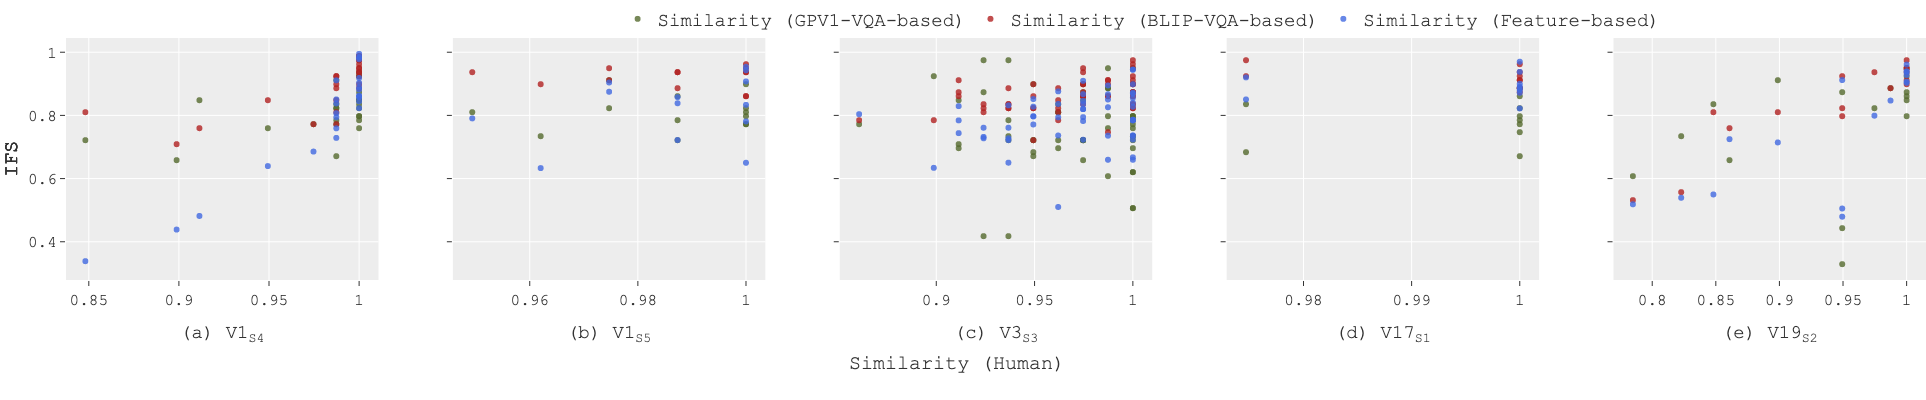

In [173]:
color_v = ['darkolivegreen', 'firebrick', 'royalblue']

fig = make_subplots(rows=1, cols=5, shared_yaxes=True)

for c, rs in enumerate(req_seg):
    vid = rs.split('_')[0]
    seg = rs.split('_')[1]
    file = f'video-{vid}-segment-{seg}.csv'
    file_path = os.path.join(csv_folder, file)
    df = pd.read_csv(file_path, index_col = [0])
    if c==0:
        showlegend=True
    else:
        showlegend=False
    
    fig.add_trace(
        go.Scatter(
            x=df['Similarity (Human)'], 
            y=df['Similarity (VQA-based)'],
            mode="markers",
            marker=dict(color='darkolivegreen'),
            name='Similarity (GPV1-VQA-based)',
            legendgroup='Similarity (GPV1-VQA-based)',
            showlegend=showlegend
        ),
        row=1, col=c+1
    )
                 
    fig.add_trace(
        go.Scatter(
            x=df['Similarity (Human)'], 
            y=df['Similarity (Lavis-VQA-based)'],
            mode="markers",
            marker=dict(color='firebrick'),
            name='Similarity (BLIP-VQA-based)',
            legendgroup='Similarity (BLIP-VQA-based)',
            showlegend=showlegend
        ),
        row=1, col=c+1
    )
    
    fig.add_trace(
        go.Scatter(
            x=df['Similarity (Human)'], 
            y=df['Similarity (Feature-based)'],
            mode="markers",
            marker=dict(color='royalblue'),
            name='Similarity (Feature-based)',
            legendgroup='Similarity (Feature-based)',
            showlegend=showlegend
        ),
        row=1, col=c+1
    )
    fig['layout']['xaxis{}'.format(c+1)]['title']=f"({num[c]}) V{vid}<sub>S{seg}</sub>"
    # fig.update_xaxes(
    #     title_text = f"Similarity (Human) (V{vid}<sub>S{seg}</sub>)",
    #     title_font = {"size": 10},
    #     title_standoff = 5)

fig.update_yaxes(
        title_text = "IFS",
        title_font = {"size": 20},
        title_standoff = 0)
    
fig['layout']['yaxis{}'.format(1)]['title']=f""

    
#     fig = px.scatter(
#         df, 
#         x="Similarity (Human)", 
#         y=["Similarity (VQA-based)", "Similarity (Lavis-VQA-based)", "Similarity (Feature-based)"],
#         color_discrete_sequence=color_v,
#         template="ggplot2",
#         height=400, width=650
        
#     )
    
fig.update_traces(
    marker=dict(
        size=6,
        opacity=0.8),
        selector=dict(
            mode='markers'
        )
)

fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.0,
        xanchor="right",
        x=0.86,
        bgcolor='rgba(0,0,0,0)',
        title=None,
        font=dict(
            size=19
        )
    ))
    
fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=120),
    font_family="Courier New",
    title_font_family="Times New Roman",
    font=dict(size=16),
    template='ggplot2',
    width=1500,
    height=400
)


fig.add_annotation(dict(font=dict(size=20),
                                        x=0.42,
                                        y=-0.4,
                                        showarrow=False,
                                        text="Similarity (Human)",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))
fig.write_image(
    os.path.join(f"scatter_plot_final.pdf"), 
    format='pdf'
)  
    
fig.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px


out_folder = "/Users/imrankabir/Downloads/results/plot_corr/gpv_vs_resnet"

for vid in df.keys():
    for seg in df[vid].keys():
        data = df[vid][seg]

        layout = dict(plot_bgcolor='white',
                      title=f'video-{vid}-segment-{seg}.png',
                      width=800,
                      height=800,
                      margin=dict(t=30, l=30, r=30, b=30),
                      xaxis=dict(title='gt Feature Similarity',
                                 range=[0.0, 1.0],
                                 linecolor='#d9d9d9',
                                 showgrid=False,
                                 mirror=True),
                      yaxis=dict(title='GPV Feature Similarity',
                                 range=[0.0, 1.0],
                                 linecolor='#d9d9d9',
                                 showgrid=False,
                                 mirror=True))

        fig_tmp = px.scatter(x=data['gpv-feature-cos'],
                          y=data['resnet-152'],
                          trendline='ols')

        fig = go.Figure(data=fig_tmp.data, layout=layout)

        fig.show()
        fig.write_image(os.path.join(out_folder, f'video-{vid}-segment-{seg}-corr.png'))
        # img_bytes = fig.to_image(format="png")
        #
        # with open(os.path.join(out_folder, f'video-{vid}-segment-{seg}-corr.png'), 'wb') as f:
        #     f.write(img_bytes)